In [2]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()  # for plot styling

In [3]:
partsA=pd.read_csv('PunchPart.csv') #2022 Data
partsB=pd.read_csv('parts2.csv') #2021 - 2019 Data

mainPartsA = partsA[['Status','Subsystem','Supplier','Qty.','Cost']] #Getting the cols we actually need
mainPartsB = partsB[['Status','Subsystem','Supplier','Qty.','Cost']]

totalParts = [mainPartsA, mainPartsB] #Joining two databases

In [4]:
totalSet = pd.concat(totalParts)#Combining the dataframes
totalSet.head() #Take a peek 

,Status,Subsystem,Supplier,Qty.,Cost
0,Ordered,Final Drive,AutoTech,1.0,2784.38
1,Ordered,Chassis,ECS Tuning,1.0,399.00
2,In Stock,Business,Amazon,5.0,28.79
3,In Stock,Powertrain,Amazon,1.0,28.99
4,In Stock,Powertrain,Amazon,1.0,22.99


In [5]:
totalSet = totalSet.dropna()#Dropping all the null values
totalSet.corr()#Finally got the cost to read in

,Qty.,Cost
Qty.,1.000000,-0.072773
Cost,-0.072773,1.000000


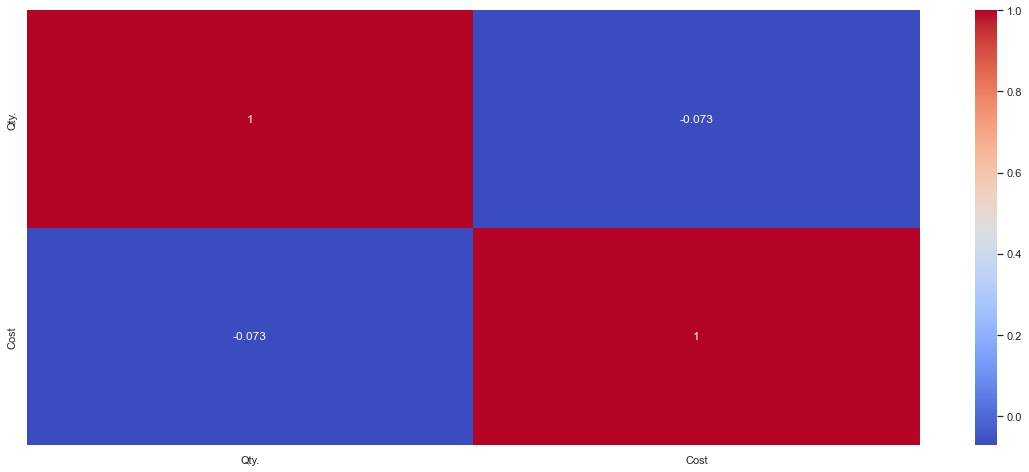

In [6]:
#Heat map code
plt.figure(figsize= (20,8))
sns.heatmap(totalSet.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [8]:
#Putting data into a SQL Database
import sqlite3

conn = sqlite3.connect('test_database')
c = conn.cursor()

c.execute('CREATE TABLE IF NOT EXISTS parts (parts_name text) ')
conn.commit()

data = {'part_name': ['Status','Subsystem','Supplier','Qty.','Cost']}

totalSet.to_sql('parts', conn, if_exists='replace', index = False)
 
c.execute('''  
SELECT * FROM parts
          ''')

for row in c.fetchall():
    print (row)

('Ordered', 'Final Drive', 'AutoTech', 1.0, 2784.38)
('Ordered', 'Chassis', 'ECS Tuning', 1.0, 399.0)
('In Stock', 'Business', 'Amazon', 5.0, 28.79)
('In Stock', 'Powertrain', 'Amazon', 1.0, 28.99)
('In Stock', 'Powertrain', 'Amazon', 1.0, 22.99)
('In Stock', 'Powertrain', 'Amazon', 1.0, 7.99)
('In Stock', 'Powertrain', 'Amazon', 1.0, 20.86)
('In Stock', 'Powertrain', 'Amazon', 1.0, 23.98)
('In Stock', 'Suspension', 'Lowes', 7.0, 3.68)
('In Stock', 'Suspension', 'Lowes', 1.0, 8.98)
('In Stock', 'Suspension', 'Lowes', 7.0, 7.58)
('In Stock', 'Suspension', 'Lowes', 9.0, 6.88)
('In Stock', 'Powertrain', 'Kum & Go', 1.0, 21.61)
('Canceled', 'Suspension', 'Micro-Measurements', 2.0, 0.0)
('In Stock', 'Powertrain', 'Totalflow', 1.0, 32.66)
('In Stock', 'Business', 'Cyclone Awards', 30.0, 19.5)
('In Stock', 'Business', 'CopyWorks', 1.0, 101.41)
('In Stock', 'Business', 'Amazon', 13.0, 6.94)
('In Stock', 'Powertrain', 'jegs', 1.0, 248.4)
('In Stock', 'Powertrain', 'jegs', 2.0, 19.99)
('Hold Off